# 說明：有些結果有原始資料會盡量存成txt然後進行讀取，有些則是無原始資料，會退而求其次使用show出圖片的方式。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import seaborn as sns
from PIL import Image
import os
from matplotlib.patches import Rectangle
import textwrap
import matplotlib.cm as cm

# Adding Rate Results(VTIRF(Optical Filter) for example)
## 在這個章節中我們會展示1.不同adding rate的收斂速度，2.比較不同adding rate的效果並畫出boxplot

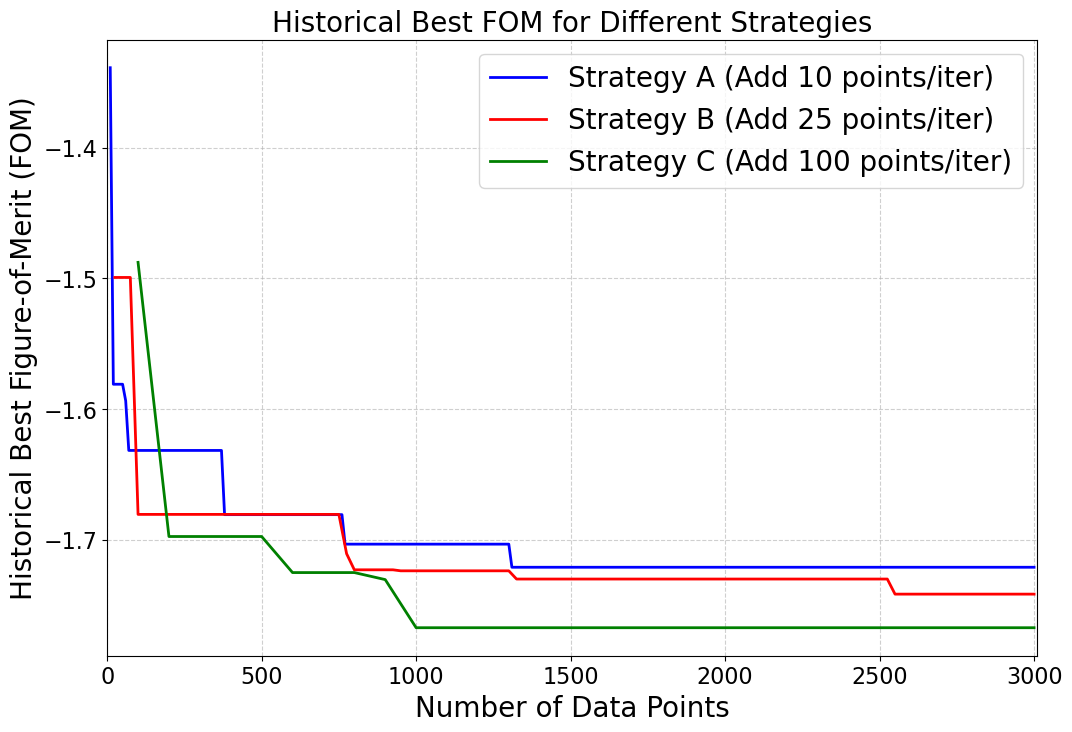

--- 各策略的最終結果 ---
策略 A (新增 10 筆/次)：最終歷史最佳 FOM = -1.7211
策略 B (新增 25 筆/次)：最終歷史最佳 FOM = -1.7416
策略 C (新增 100 筆/次)：最終歷史最佳 FOM = -1.7673


In [2]:

# 函數：從原始文字中提取 FOM 數值
def get_fom_values(raw_data):
    fom_values_str = re.findall(r'這個iter最小的foms_train: ([-+]?\d*\.\d+)', raw_data)
    return [float(fom) for fom in fom_values_str]

# 函數：計算歷史最佳 FOM
def get_historical_best(data):
    if not data:
        return []
    historical_best = [data[0]]
    for i in range(1, len(data)):
        if data[i] < historical_best[-1]:
            historical_best.append(data[i])
        else:
            historical_best.append(historical_best[-1])
    return historical_best

# --- 數據集1：基本設定 ---
file_name_1 = 'iteration_raw_data_1.txt'
try:
    with open(file_name_1, 'r', encoding='utf-8') as file:
        raw_data_1 = file.read()
    
except FileNotFoundError:
    print(f"錯誤: 找不到檔案 {file_name_1}")
except IOError:
    print(f"錯誤: 無法讀取檔案 {file_name_1}")


added_points_1 = 10
fom_values_1 = get_fom_values(raw_data_1)
historical_fom_1 = get_historical_best(fom_values_1)
data_points_1 = np.arange(added_points_1, (len(historical_fom_1) + 1) * added_points_1, added_points_1)

# --- 數據集2：每次新增 5 筆資料，總資料點數相同 ---
file_name_2 = 'iteration_raw_data_2.txt'
try:
    with open(file_name_2, 'r', encoding='utf-8') as file:
        raw_data_2 = file.read()
    
except FileNotFoundError:
    print(f"錯誤: 找不到檔案 {file_name_2}")
except IOError:
    print(f"錯誤: 無法讀取檔案 {file_name_2}")

added_points_2 = 25
fom_values_2 = get_fom_values(raw_data_2)
historical_fom_2 = get_historical_best(fom_values_2)
data_points_2 = np.arange(added_points_2, (len(historical_fom_2) + 1) * added_points_2, added_points_2)


# --- 數據集3：每次新增 20 筆資料，總資料點數相同 ---
# --- 步驟 2: 讀取檔案內容並存入 raw_data 變數 ---
file_name_3 = 'iteration_raw_data_3.txt'
try:
    with open(file_name_3, 'r', encoding='utf-8') as file:
        raw_data_3 = file.read()
    
except FileNotFoundError:
    print(f"錯誤: 找不到檔案 {file_name_3}")
except IOError:
    print(f"錯誤: 無法讀取檔案 {file_name_3}")

added_points_3 = 100
fom_values_3 = get_fom_values(raw_data_3)
historical_fom_3 = get_historical_best(fom_values_3)
data_points_3 = np.arange(added_points_3, (len(historical_fom_3) + 1) * added_points_3, added_points_3)

# 繪製圖表
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# 繪製三條歷史最佳 FOM 曲線
plt.plot(data_points_1, historical_fom_1, color='blue', linestyle='-', linewidth=2, label='Strategy A (Add 10 points/iter)')
plt.plot(data_points_2, historical_fom_2, color='red', linestyle='-', linewidth=2, label='Strategy B (Add 25 points/iter)')
plt.plot(data_points_3, historical_fom_3, color='green', linestyle='-', linewidth=2, label='Strategy C (Add 100 points/iter)')

# 設定圖表標題與軸標籤
plt.title('Historical Best FOM for Different Strategies', fontsize=20)
plt.xlabel('Number of Data Points', fontsize=20)
plt.ylabel('Historical Best Figure-of-Merit (FOM)', fontsize=20)

# 顯示圖例
plt.legend(fontsize=20)

# 增加格線
plt.grid(True, linestyle='--', alpha=0.6)

# 確保所有線條都在相同的 x 軸範圍內顯示
max_data_points = max(data_points_1.max(), data_points_2.max(), data_points_3.max())
plt.xlim(0, max_data_points + added_points_1) # 增加一些邊界，讓圖更美觀

# 顯示圖表
plt.show()

print("--- 各策略的最終結果 ---")
print(f"策略 A (新增 {added_points_1} 筆/次)：最終歷史最佳 FOM = {historical_fom_1[-1]:.4f}")
print(f"策略 B (新增 {added_points_2} 筆/次)：最終歷史最佳 FOM = {historical_fom_2[-1]:.4f}")
print(f"策略 C (新增 {added_points_3} 筆/次)：最終歷史最佳 FOM = {historical_fom_3[-1]:.4f}")

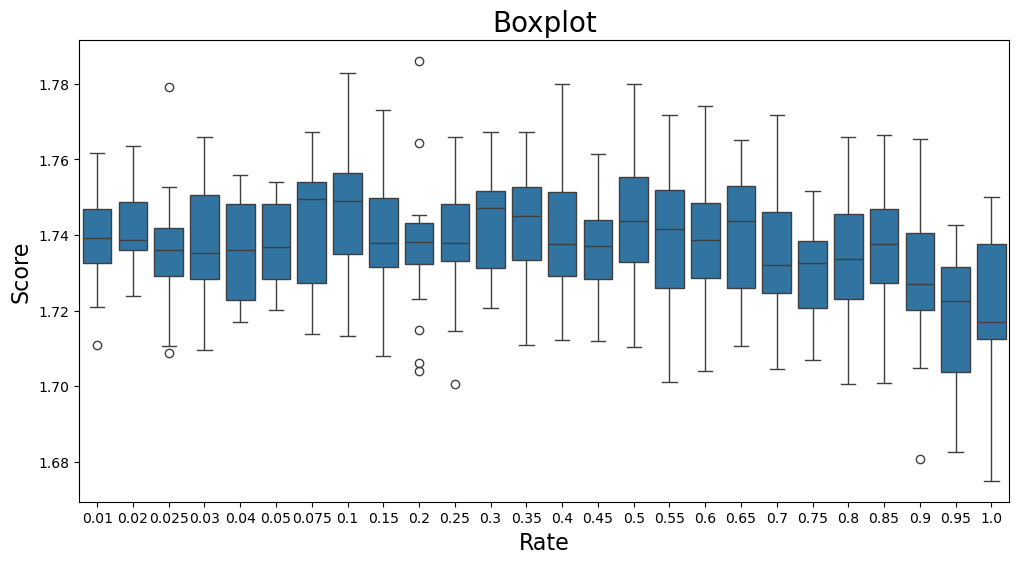

In [3]:
# 範例資料
data = {
    'rate': [1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,
              1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,1000/1000,
              950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,
              950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,950/1000,
              900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,
              900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,900/1000,
              850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,
              850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,850/1000,
              800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,
              800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,800/1000,
             750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,
             750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,750/1000,
              700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,
              700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,700/1000,
              650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,
              650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,650/1000,
              600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,
              600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,600/1000,
              550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,
              550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,550/1000,
             500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,
             500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,500/1000,
             450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,
              450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,450/1000,
              400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,
              400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,400/1000,
              350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,
              350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,350/1000,
              300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,
              300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,300/1000,
             250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,
             250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,250/1000,
             200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,
             200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,200/1000,
             150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,
             150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,150/1000,
             100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,
             100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,100/1000,
             75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,
             75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,75/1000,
             50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,
             50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,50/1000,
             40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,
             40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,40/1000,
             30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,
             30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,30/1000,
             25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,
             25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,25/1000,
             20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,
             20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,20/1000,
             10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,
             10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000,10/1000],
    'score': [1.7502,1.736,1.6929,1.73917,1.71275,1.704,1.722445,1.7112748,1.716712,1.706,
              1.7161,1.73656,1.746158,1.714058,1.7140476,1.737122,1.675,1.717053225,1.740097875,1.739110018,
              #950
              1.7313731909929133,1.729202924946392,1.726688801399472,1.7402036167150228,1.683167543401952,1.7021793996743741,1.7413375553924622,1.7057526036820374,1.7218922360697935,1.704585627746549,
              1.7394076511830328,1.7425595703807648,1.7043454677857908,1.7014047909415377,1.7204215264991443,1.7321336437743078,1.7231904150984367,1.6824761319101755,1.6832017439151268,1.7302648110895995,
              #900
              1.7395739164513406,1.680633290559556,1.75610514077754,1.7257861880634484,1.7433360675461869,1.7346760343711738,1.7654602853056787,1.7240020744417661,1.7349749405934487,1.7047118886341845,
              1.7199218527938698,1.7463896043846663,1.7335184422877532,1.7113385945537967,1.7203081029347134,1.7284492624102572,1.721358139585323,1.7184361787132945,1.7528104368097657,1.7226004313751855,              
              #850
              1.700830053820231,1.7391005952392755,1.7338897144165855,1.742107145388854,1.7256037618592786,1.7625763238690444,1.7625283903765763,1.7180173799831715,1.7439372915561437,1.7200020506082847,
              1.7280324191285406,1.7348522201673697,1.7501436040248042,1.7362805593185888,1.7172661619320557,1.7513647878361513,1.745947198905328,1.7664484712497703,1.739294307019933,1.7321924612054111,              
              #800
              1.7500013387237932,1.7338010871617047,1.7004837602563827,1.73354548933439,1.7455964288747625,1.728113584208854,1.7165605457980768,1.7401730039353223,1.740714785664013,1.7018085042800721,
              1.726119868128995,1.7491159361202908,1.7170538122368038,1.7250371153401491,1.76587245382074,1.711296318145449,1.7299698122785319,1.7628333866784318,1.7413962921844612,1.7454332712981067,           
              
              #750
              1.749587653,1.742031787,1.737319042,1.735633215,1.726358666,1.748925724,1.711138959,1.720114427,1.722473413,1.73609778,
              1.751685562,1.74431428,1.720867925,1.729642736,1.706971749,1.719439895,1.707206516,1.73693849,1.735071355,1.730367289,
              #700
              1.7175588560986723,1.7044297279503189,1.7410090724980791,1.7321258450645962,1.7188544192473685,1.761531699471156,1.7449274457235069,1.7249632261317245,1.75203206763707,1.7069011849166613,
              1.7251257477310136,1.7322570454636075,1.7239875158914229,1.7248376235760412,1.7718970463272663,1.732348182950374,1.7314511584718641,1.7496791053656466,1.744554690334611,1.7519175605219686,
              #650
              1.7242551957593026,1.751701976480401,1.7262793092756132,1.7107376092605602,1.732975321273254,1.7122469375207932,1.7445025044709568,1.7339386873334877,1.7487332735070757,1.7629591900762578,
              1.7214615680798124,1.7400166151647645,1.7429747484065226,1.7250149511573096,1.7651064228113849,1.757596551461664,1.7649145613066384,1.7448293317017523,1.7573009027327826,1.74760570922183,
              
              #600
              1.7118148939992117,1.7285471868586848,1.7304718532161079,1.7532166129124636,1.7405541459980756,1.728696347500864,1.7326357442028835,1.7087357475626386,1.7636625585169996,1.710402005229527,
              1.753344945139414,1.7440121501774033,1.7553578644524508,1.7467341310328683,1.7370561508001199,1.7423531231169611,1.7039518249909367,1.7451625276215317,1.7323298928979523,1.7740431192058295,              
              #550
              1.7010975974693996,1.7494622858095996,1.763101365690284,1.7265644992154123,1.7703345781961808,1.740014402878017,1.74774632615244,1.7588844289344288,1.763349566289984,1.724927487260047,
              1.725790000662427,1.7148532638926928,1.7469466635892028,1.7321953359372004,1.7718605176118059,1.7332284928726862,1.7255113155702084,1.7261297752700508,1.74636103243287,1.7432538293030906,
              #500
              1.7618,1.7473,1.7273,1.710383135,1.774081143,1.740216125,1.779893539,1.76680612,1.748584005,1.722779057,
              1.753757399,1.760514696,1.722215672,1.731210877,1.747177602,1.747228605,1.738765134,1.740414461,1.733272607,1.736723644,
              #450
              1.7224951523410081,1.744841265157124,1.7119005596459895,1.7435284795914543,1.7303392521819332,1.742542924378778,1.7511657025984912,1.7424244724819544,1.7369478680424872,1.7187278717089567,
              1.7402090145599354,1.732541173434017,1.7372333012379841,1.7358955355080934,1.7492276898278485,1.752296366070369,1.7355840893064511,1.7147121317431329,1.7615689211511742,1.7219417245089077,
              #400
              1.7301078989615633,1.7553168393663394,1.7651806119013695,1.7354250941172122,1.712364020100188,1.7499267235951013,1.729325856214859,1.739969403756435,1.7447778051422653,1.7589785015843182,
              1.729201845778247,1.7457259670377463,1.779912462931005,1.7342205502730363,1.7552949744469963,1.7339858823698637,1.7290030290048002,1.7204582419508816,1.740080580781268,1.7201381968889249,
              
              #350
              1.7107974609461116,1.7327665869501752,1.7562415861099707,1.7673011148004776,1.755731317590426,1.756070996313979,1.7189921225107638,1.745161618332366,1.7515328243096333,1.7324171924327292,
              1.7334862921558494,1.751391427982615,1.744450332006815,1.719144822910238,1.7377134755213617,1.7451930681295973,1.751580438844162,1.7429486225875392,1.758984043137225,1.75175828273552,

              #300
              1.7544654669083652,1.7320572382361517,1.7291438899610738,1.7475168274646595,1.7479183300708985,1.7269175356872568,1.7522093189048442,1.7467972813988197,1.7574580079013593,1.7671711879289076,
              1.7207754530481552,1.741830927731256,1.7385275958020872,1.728052528469867,1.7466089253626098,1.7513629341023602,1.722740728459885,1.749541876222752,1.7599091236221538,1.7496863719034597,
              #250
              1.765972328,1.73705134,1.733084695,1.747089695,1.73900822,1.734599903,1.746080826,1.700706455,1.738087126,1.751151298,
              1.714492775,1.753779229,1.753162817,1.729511243,1.733017805,1.72325298,1.734720563,1.741099137,1.737920209,1.7568582,
              #200
              1.7644,1.7363,1.723,1.745226871,1.714967345,1.786131937,1.703951719,1.706061194,1.74330683,1.741971462,
              1.735919733,1.743222031,1.740487119,1.728506951,1.733683045,1.738904067,1.74507146,1.740062668,1.737205498,1.737283154,
              #150
              1.749246489,1.750276637,1.712433596,1.772973065,1.765063865,1.734625218,1.741745243,1.735079695,1.731959218,1.726700715,
              1.768544054,1.749631006,1.729804273,1.744304721,1.729512242,1.767447244,1.707977296,1.738632509,1.736335515,1.737122117,

              #100
              1.7828,1.7514,1.7467,1.752925539,1.713247611,1.744744872,1.752803855,1.757801518,1.758506486,1.76733498,
              1.756050097,1.734390027,1.732479882,1.751345065,1.735168924,1.746917969,1.737663605,1.728927956,1.734024589,1.762896805,
              
              1.726169511,1.762095747,1.742726736,1.727540066,1.755863899,1.765550571,1.749520042,1.749689417,1.763485894,1.7221012,
              1.715861823,1.739397818,1.750470184,1.713871699,1.767192268,1.751075796,1.719789501,1.737949594,1.750379516,1.753600927,
              
              1.749,1.7337,1.7271,1.735124464,1.75403723,1.725091262,1.736863338,1.720041338,1.728853776,1.745362132,              
              1.748988925,1.742686715,1.747954274,1.737052809,1.725618197,1.741113158,1.736684786,1.726476346,1.749693603,1.750234592,
             
              1.726899371,1.747375853,1.718854872,1.744393966,1.742245577,1.731979179,1.755785709,1.717078248,1.75037051,1.734473313,
              1.754496118,1.722822466,1.72296478,1.75392362,1.752837932,1.722154655,1.744100503,1.726902787,1.737782995,1.717533663,
              
              1.7356,1.7276,1.7095,1.748613162,1.726952221,1.745159917,1.730089175,1.756823313,1.765959084,1.762789403,
              1.731764417,1.752643966,1.744245584,1.728724015,1.728657539,1.726402672,1.725419228,1.734834514,1.753841467,1.749850913,
              
              1.750622785,1.73220822,1.779168746,1.741078591,1.741624892,1.728941785,1.729381928,1.73576291,1.734182648,1.729345836,
              1.708715251,1.741772525,1.727697507,1.742201103,1.740032041,1.736377293,1.710546166,1.722299649,1.752690597,1.751354978,
              
              1.7476,1.7365,1.7293,1.763514685,1.731556114,1.752607986,1.738365775,1.7403945,1.750849789,1.737881902,
              1.723852988,1.745943264,1.761304007,1.738203372,1.755436183,1.730104457,1.748078552,1.735146539,1.73630574,1.738949098,
              
              1.71079318,1.754134824,1.733567729,1.742363214,1.744302738,1.721068788,1.725298572,1.738606368,1.761776305,1.739704841,
              1.729398183,1.733756607,1.749700195,1.73523608,1.755014183,1.746814417,1.747428284,1.734835175,1.727824715,1.74433879]
}
df = pd.DataFrame(data)

# 畫 boxplot
plt.figure(figsize=(12, 6))
ax= sns.boxplot(x='rate', y='score', data=df, legend='brief')
ax.set_xlabel("Rate", fontsize=16)
ax.set_ylabel("Score", fontsize=16)
plt.title('Boxplot',fontsize=20)
plt.show()

# K factor and compared with one-shot("Photomask" for example) (FOM理想最小值為0) 
## 在這個部分會討論K factor的影響，以及與One-Shot的比較，顯示Initial dataset數量 與 後來新增的annealing出來的總數要平衡比較好，一開始高能量的initial data太多時，會讓最佳化太容易偏向廣度搜尋。 

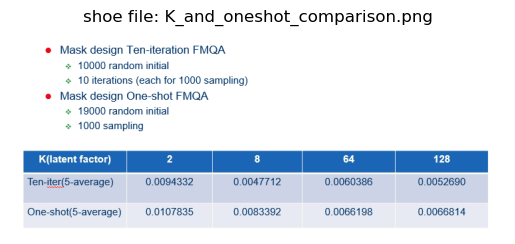

成功讀取並顯示 'K_and_oneshot_comparison.png'，影像尺寸為 (746, 307)。


In [4]:

def show_png_image(file_path):
    """
    讀取一個 PNG 檔案並顯示它。
    
    Args:
        file_path (str): PNG 檔案的路徑。
    """
    if not os.path.exists(file_path):
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查檔案路徑是否正確。")
        return

    try:
        # 使用 Pillow 的 Image.open() 函式讀取影像
        img = Image.open(file_path)
        
        # 使用 Matplotlib 來顯示影像
        plt.imshow(img)
        plt.title(f"shoe file: {os.path.basename(file_path)}")
        plt.axis('off')  # 關閉座標軸，讓圖看起來更乾淨
        plt.show()

        print(f"成功讀取並顯示 '{file_path}'，影像尺寸為 {img.size}。")

    except Exception as e:
        print(f"處理檔案時發生錯誤：{e}")

# 請將 'your_image.png' 替換為你的 PNG 檔案名稱或完整路徑
show_png_image('K_and_oneshot_comparison.png')

# Energy-based choosing vs FOM-based choosing (VTIRF(Optical Filter)for example)
## 在FMQA方法中，新增進資料集的選取標準，可以有 Energy-based choosing 或是 FOM-based choosing

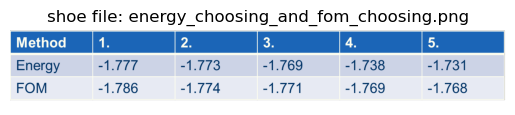

成功讀取並顯示 'energy_choosing_and_fom_choosing.png'，影像尺寸為 (1339, 203)。


In [5]:
def show_png_image(file_path):
    """
    讀取一個 PNG 檔案並顯示它。
    
    Args:
        file_path (str): PNG 檔案的路徑。
    """
    if not os.path.exists(file_path):
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查檔案路徑是否正確。")
        return

    try:
        # 使用 Pillow 的 Image.open() 函式讀取影像
        img = Image.open(file_path)
        
        # 使用 Matplotlib 來顯示影像
        plt.imshow(img)
        plt.title(f"shoe file: {os.path.basename(file_path)}")
        plt.axis('off')  # 關閉座標軸，讓圖看起來更乾淨
        plt.show()

        print(f"成功讀取並顯示 '{file_path}'，影像尺寸為 {img.size}。")

    except Exception as e:
        print(f"處理檔案時發生錯誤：{e}")

# 請將 'your_image.png' 替換為你的 PNG 檔案名稱或完整路徑
show_png_image('energy_choosing_and_fom_choosing.png')

# Thickness Encoding (VTIRF(Optical Filter) for example) 
## 在這章中，1.我們會嘗試不同厚度的選擇的排列組合，發現銀的厚度非常關鍵，
## 因此，2.將此資訊編碼進量子位元(Qubits)中。

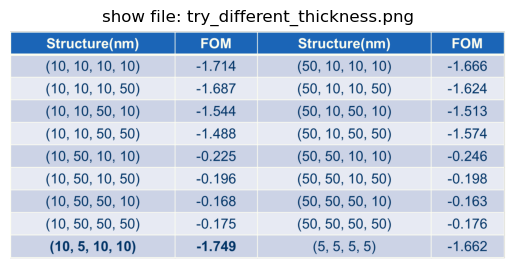

成功讀取並顯示 'try_different_thickness.png'，影像尺寸為 (1340, 629)。


In [6]:
def show_png_image(file_path):
    """
    讀取一個 PNG 檔案並顯示它。
    
    Args:
        file_path (str): PNG 檔案的路徑。
    """
    if not os.path.exists(file_path):
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查檔案路徑是否正確。")
        return

    try:
        # 使用 Pillow 的 Image.open() 函式讀取影像
        img = Image.open(file_path)
        
        # 使用 Matplotlib 來顯示影像
        plt.imshow(img)
        plt.title(f"show file: {os.path.basename(file_path)}")
        plt.axis('off')  # 關閉座標軸，讓圖看起來更乾淨
        plt.show()

        print(f"成功讀取並顯示 '{file_path}'，影像尺寸為 {img.size}。")

    except Exception as e:
        print(f"處理檔案時發生錯誤：{e}")

# 請將 'your_image.png' 替換為你的 PNG 檔案名稱或完整路徑
show_png_image('try_different_thickness.png')

# 將厚度資訊編碼進量子位元(Qubits)中，發現得到與重複多次試的排列組合是同一組，都是銀厚度5奈米，其他材料10奈米。

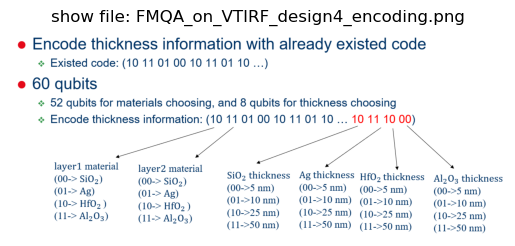

成功讀取並顯示 'FMQA_on_VTIRF_design4_encoding.png'，影像尺寸為 (1265, 526)。


In [7]:
def show_png_image(file_path):
    """
    讀取一個 PNG 檔案並顯示它。
    
    Args:
        file_path (str): PNG 檔案的路徑。
    """
    if not os.path.exists(file_path):
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查檔案路徑是否正確。")
        return

    try:
        # 使用 Pillow 的 Image.open() 函式讀取影像
        img = Image.open(file_path)
        
        # 使用 Matplotlib 來顯示影像
        plt.imshow(img)
        plt.title(f"show file: {os.path.basename(file_path)}")
        plt.axis('off')  # 關閉座標軸，讓圖看起來更乾淨
        plt.show()

        print(f"成功讀取並顯示 '{file_path}'，影像尺寸為 {img.size}。")

    except Exception as e:
        print(f"處理檔案時發生錯誤：{e}")

# 請將 'your_image.png' 替換為你的 PNG 檔案名稱或完整路徑
show_png_image('FMQA_on_VTIRF_design4_encoding.png')


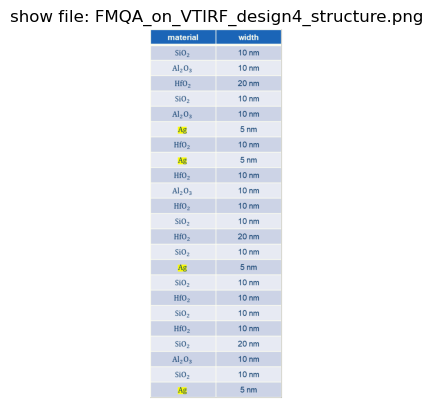

成功讀取並顯示 'FMQA_on_VTIRF_design4_structure.png'，影像尺寸為 (347, 966)。


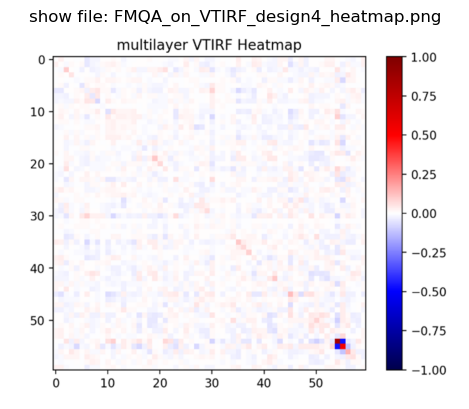

成功讀取並顯示 'FMQA_on_VTIRF_design4_heatmap.png'，影像尺寸為 (831, 683)。


In [8]:
show_png_image('FMQA_on_VTIRF_design4_structure.png')
show_png_image('FMQA_on_VTIRF_design4_heatmap.png')

# Best Structure and Spectrum and magnetic intensity
## FOM:-1.786
### FOM choosing
### Initial number: 10000
### Choosing 500 from 1000 samplings for 50 iterations

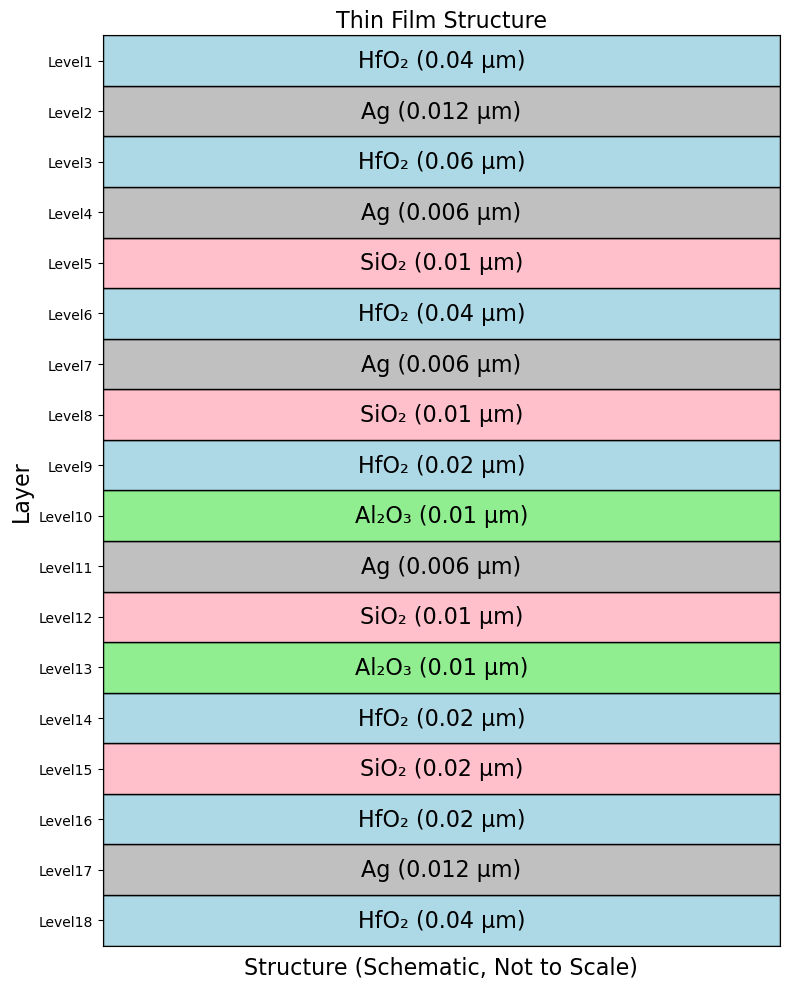

In [9]:

# Data for the film layers
layers_data = [
    {'name': 'Level1', 'thickness': 0.04, 'material': 'HfO2'},
    {'name': 'Level2', 'thickness': 0.012, 'material': 'Ag'},
    {'name': 'Level3', 'thickness': 0.06, 'material': 'HfO2'},
    {'name': 'Level4', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level5', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level6', 'thickness': 0.04, 'material': 'HfO2'},
    {'name': 'Level7', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level8', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level9', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level10', 'thickness': 0.01, 'material': 'Al2O3'},
    {'name': 'Level11', 'thickness': 0.006, 'material': 'Ag'},
    {'name': 'Level12', 'thickness': 0.01, 'material': 'SiO2'},
    {'name': 'Level13', 'thickness': 0.01, 'material': 'Al2O3'},
    {'name': 'Level14', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level15', 'thickness': 0.02, 'material': 'SiO2'},
    {'name': 'Level16', 'thickness': 0.02, 'material': 'HfO2'},
    {'name': 'Level17', 'thickness': 0.012, 'material': 'Ag'},
    {'name': 'Level18', 'thickness': 0.04, 'material': 'HfO2'}
]

# Colors for each material
material_colors = {
    'HfO2': '#ADD8E6',
    'Ag': '#C0C0C0',
    'SiO2': '#FFC0CB',
    'Al2O3': '#90EE90'
}

# Mapping materials to their Unicode subscript format
material_unicode_map = {
    'HfO2': 'HfO₂',
    'Ag': 'Ag',
    'SiO2': 'SiO₂',
    'Al2O3': 'Al₂O₃'
}

def plot_thin_film_structure(layers):
    """
    Plots the thin film structure using standard Unicode subscripts, with layers sorted from bottom to top.
    """
    fig, ax = plt.subplots(figsize=(8, 10))
    layer_height = 1
    current_y = 0
    
    # 這裡將 layers_data 列表反轉，從而實現由下至上繪圖
    reversed_layers = layers[::-1]
    
    for i, layer in enumerate(reversed_layers):
        material_plain = layer['material']
        thickness = layer['thickness']
        
        rect_color = material_colors.get(material_plain, 'white')
        
        ax.add_patch(Rectangle((0, current_y), 1, layer_height, facecolor=rect_color, edgecolor='black'))
        
        material_with_subscript = material_unicode_map.get(material_plain, material_plain)
        
        label_text = f"{material_with_subscript}\n({thickness} µm)"
        wrapped_label = textwrap.fill(label_text, width=15)
        
        ax.text(0.5, current_y + layer_height / 2, wrapped_label, ha='center', va='center', fontsize=16)
        
        current_y += layer_height
        
    ax.set_title('Thin Film Structure', fontsize=16)
    ax.set_xlabel('Structure (Schematic, Not to Scale)', fontsize=16)
    ax.set_ylabel('Layer', fontsize=16)
    
    ax.set_xticks([])
    
    # 將 y 軸標籤的順序也反轉，使其與由下至上的圖層順序一致
    y_ticks = [i * layer_height + layer_height/2 for i in range(len(layers))]
    y_labels = [f"Level{i+1}" for i in range(len(layers))]
    reversed_y_labels = y_labels[::-1]
    ax.set_yticks(y_ticks, labels=reversed_y_labels)
    
    ax.set_ylim(0, current_y)
    
    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_thin_film_structure(layers_data)

已成功從兩個檔案中讀取資料。


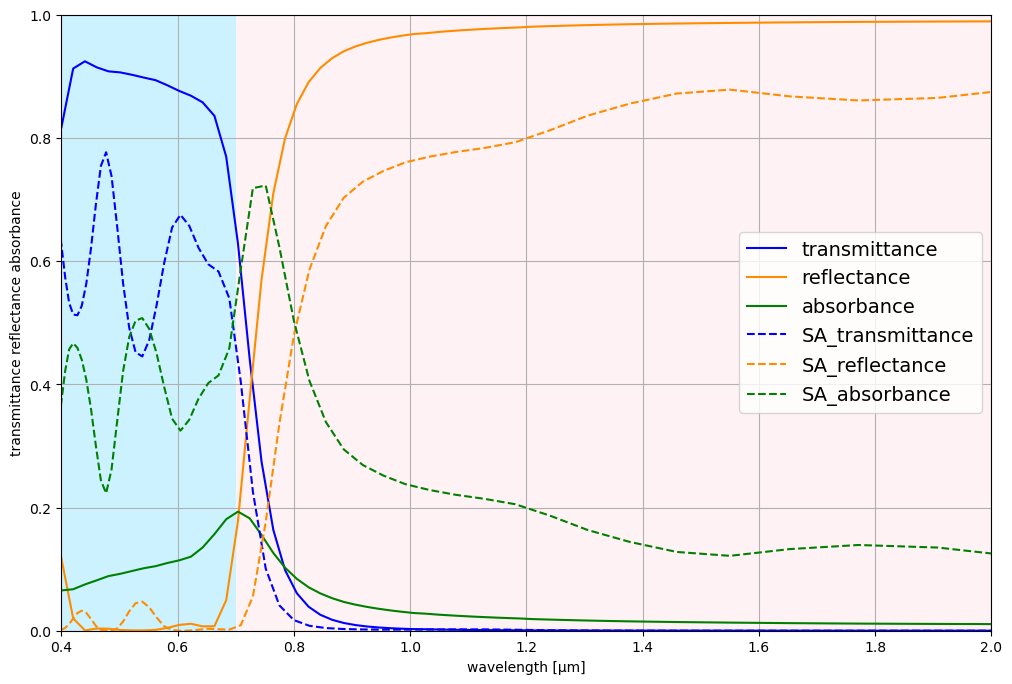

In [10]:

def plot_from_files():
    """從兩個檔案中讀取資料，並重現圖表。"""
    try:
        # 讀取 SA 資料
        sa_data = np.loadtxt('SA_plot_data.txt', skiprows=1)
        wll = sa_data[:, 0]
        Tcl_back = sa_data[:, 1]
        Rcl_back = sa_data[:, 2]
        Acl_back = sa_data[:, 3]

        # 讀取 FDTD 資料
        fdtd_data = np.loadtxt('Our_plot_data.txt', skiprows=1)
        wavelength_array = fdtd_data[:, 0]
        efficiency_array = fdtd_data[:, 1]
        reflected_flux_array = fdtd_data[:, 2]
        emissive_array = fdtd_data[:, 3]

        print("已成功從兩個檔案中讀取資料。")

    except FileNotFoundError as e:
        print(f"錯誤：找不到檔案，請確認檔案已存在。{e}")
        return
    except Exception as e:
        print(f"讀取檔案時發生錯誤：{e}")
        return

    # 重現圖表
    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.rcParams['font.size'] = 14
    plt.xlabel('wavelength [μm]')
    plt.ylabel('transmittance reflectance absorbance')
    
    # 繪製 FDTD 線條
    plt.plot(wavelength_array, efficiency_array, color='blue', label='transmittance')
    plt.plot(wavelength_array, reflected_flux_array, color='darkorange', label='reflectance')
    plt.plot(wavelength_array, emissive_array, color='green', label='absorbance')
    
    # 繪製 SA 線條
    plt.plot(wll, Tcl_back, label='SA_transmittance', color='blue', linestyle='dashed')
    plt.plot(wll, Rcl_back, label='SA_reflectance', color='darkorange', linestyle='dashed')
    plt.plot(wll, Acl_back, label='SA_absorbance', color='green', linestyle='dashed')
    
    # 設置圖表樣式
    plt.axvspan(xmin=0.4, xmax=0.7, facecolor="deepskyblue", alpha=0.2)
    plt.axvspan(xmin=0.7, xmax=2, facecolor="pink", alpha=0.2)
    plt.xlim([0.4, 2])
    plt.ylim([0, 1])
    plt.legend()
    plt.show()

# 執行讀取和繪圖功能
plot_from_files()


已成功從 '2d_data_array.npy' 讀取陣列。
讀取後的陣列形狀: (500, 176)


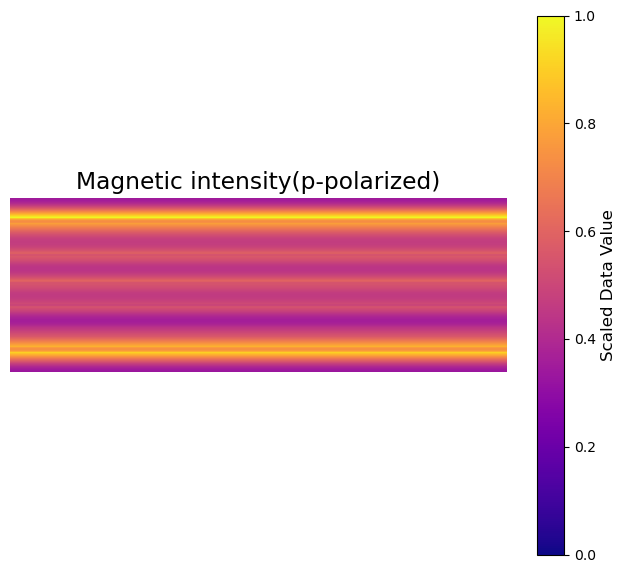

In [11]:


output_np_file = '2d_data_array.npy'
# --- 2. 讀取陣列並重現圖表 ---

def recreate_plot_from_file(file_path):
    """
    從 .npy 檔案中讀取 2D 陣列，並根據原始繪圖邏輯重現圖表。
    
    Args:
        file_path (str): .npy 檔案的路徑。
    """
    try:
        # 從 .npy 檔案讀取陣列
        reloaded_array = np.load(file_path)
        print(f"\n已成功從 '{file_path}' 讀取陣列。")
        print(f"讀取後的陣列形狀: {reloaded_array.shape}")
    except FileNotFoundError:
        print(f"錯誤：找不到檔案 '{file_path}'。")
        return
    except Exception as e:
        print(f"讀取檔案時發生錯誤：{e}")
        return

    # 由於你的原始程式碼中對陣列進行了轉置（.T），我們也進行同樣的操作
    reloaded_array = reloaded_array.T

    # 將 0-5 的數值範圍正規化到 0-1
    # 假設原始數據的最大值是 5.0
    normalized_data = reloaded_array / reloaded_array.max()
    
    # 使用 Colormap 將正規化後的數據轉換為 RGB 顏色
    # 我們選擇與你原始程式碼相同的 'plasma' colormap
    colored_data_rgba = cm.plasma(normalized_data)
    rgb_image_data = (colored_data_rgba[:, :, :3] * 255).astype(np.uint8)

    # 使用 Matplotlib 繪製圖像並添加 Color Bar
    plt.figure(figsize=(8, 7))
    plt.imshow(rgb_image_data)
    plt.title("Magnetic intensity(p-polarized)")
    plt.axis('off')

    # 添加 Color Bar
    cbar = plt.colorbar(cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=0, vmax=1)),
                        ax=plt.gca(),
                        ticks=np.linspace(0, 1, 6),
                        label='Scaled Data Value')
    cbar.set_label('Scaled Data Value', fontsize=12)
    cbar.ax.tick_params(labelsize=10)

    # 顯示圖表
    plt.show()

# 執行讀取並重現圖表的功能
recreate_plot_from_file(output_np_file)

# Titanium Nitride Design(TE)
針對TE做最佳化（FOM:0.1925）
新增加三個量子位元將長度及寬度資訊加入最佳化：
100, 200, 300, 400, 500, 600, 700, 800, 900 nm
初始訓練資料集為500筆資料，每次新增50筆資料，並執行迭代50次。
最終最佳化之結果：$d_1$上層厚度=80, $d_2$中層厚度(就是我們要設計的地方)=25, $d_3$下層厚度=60, 長與寬皆為200奈米。

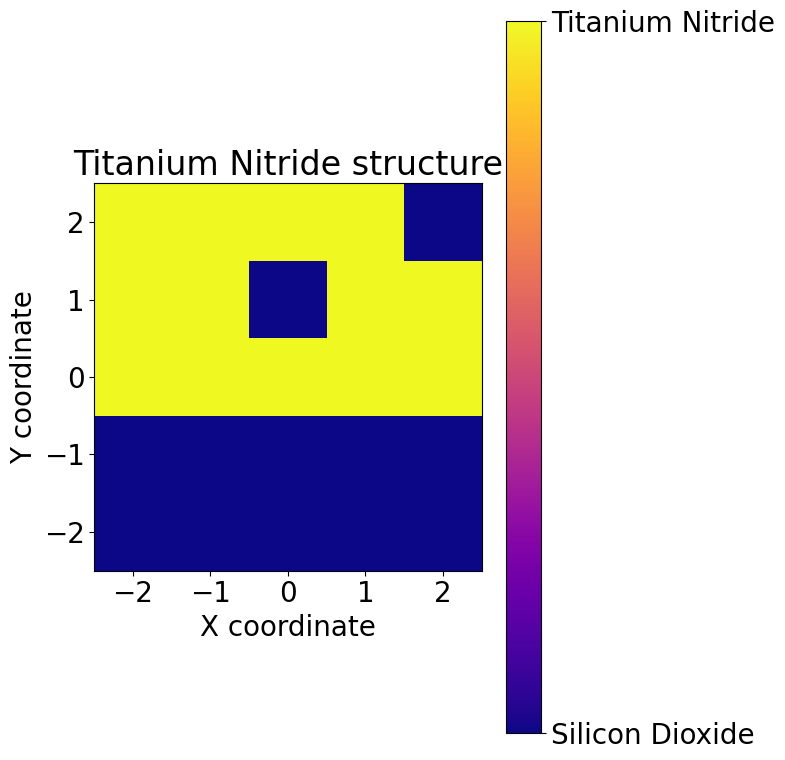

In [12]:


def plot_25_bit_squares(binary_vector):
    """
    將25個位元的二進位向量轉換為二維方塊圖。

    參數:
    binary_vector (str): 一個長度為25的字串，由'0'和'1'組成。

    回傳:
    None
    """
    # 驗證輸入字串的有效性
    if len(binary_vector) != 25 or not all(bit in '01' for bit in binary_vector):
        print("錯誤：輸入的向量必須是25個位元的二進位字串。")
        return

    # 將二進位字串轉換為 5x5 的 NumPy 陣列
    # 這裡的對應關係為：
    # 索引 i -> x 座標 = (i // 5) - 2, y 座標 = (i % 5) - 2
    matrix = np.zeros((5, 5))
    for i in range(25):
        # 根據您的座標對應關係，將 bit 1 放在 (-2, -2)
        # 這對應於矩陣的 matrix[0][0]
        row = i % 5
        col = i // 5
        matrix[row][col] = int(binary_vector[i])

    # 繪圖
    plt.rcParams['font.size'] = 20
    plt.figure(figsize=(8, 8))

    # 使用 imshow 繪製方塊圖
    # cmap='bwr' 是指藍色-白色-紅色漸層，這裡藍色代表0，紅色代表1
    # 為了使 y 軸從 -2 開始向上遞增，需要設定 origin='lower'
    # extent 定義了圖的邊界，讓座標軸正確顯示
    plt.imshow(matrix, cmap='plasma', origin='lower', extent=[-2.5, 2.5, -2.5, 2.5])

    # 設置標題和軸標籤
    plt.title('Titanium Nitride structure')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')

    # 設置座標軸刻度，使其對應方塊的中心
    plt.xticks(np.arange(-2, 3, 1))
    plt.yticks(np.arange(-2, 3, 1))

    # 顯示顏色條，以便了解顏色的對應值
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.ax.set_yticklabels(['Silicon Dioxide', 'Titanium Nitride'])

    # 顯示格線，讓方塊邊界更清晰
    #plt.grid(True, which='both', color='k', linestyle='-', linewidth=0.5)

    # 調整佈局以防止標籤重疊
    plt.tight_layout()
    plt.show()

# 範例用法：
# 輸入一個25個位元的二進位字串
#TM
#sample_vector = "0010111111111110000100000"
#TE
sample_vector = "0011100111001010011100110"
plot_25_bit_squares(sample_vector)

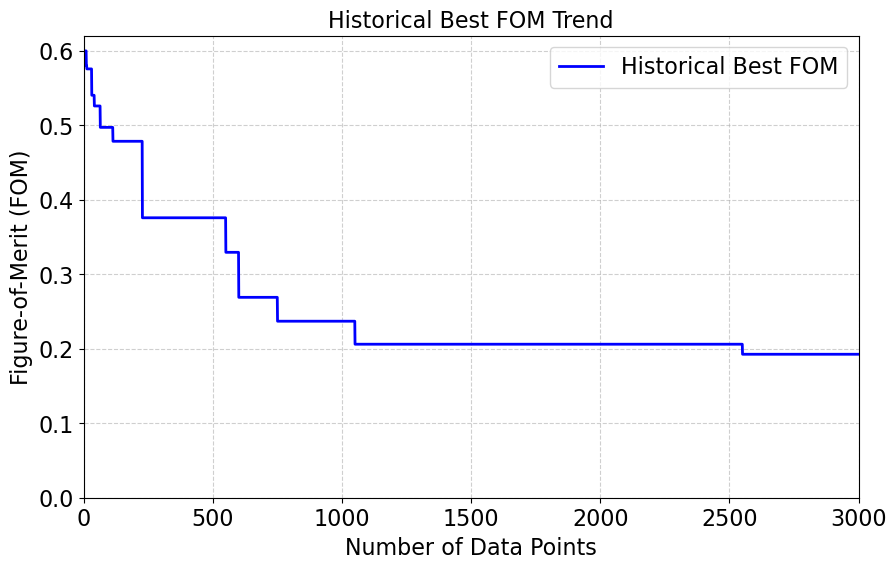

總共讀取了 3000 筆資料。
最終的歷史最佳 FOM 值為：0.192500


In [13]:


def plot_historical_best_fom(file_path):
    """
    從檔案中讀取 FOM 值，並繪製歷史最佳 FOM 趨勢圖。
    
    參數:
    - file_path (str): 包含 FOM 值的文字檔路徑。
    """
    try:
        # 讀取檔案並將每行轉換為浮點數
        with open(file_path, 'r') as file:
            fom_values = [float(line.strip()) for line in file if line.strip()]
    except FileNotFoundError:
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查路徑是否正確。")
        return
    except ValueError:
        print(f"錯誤：檔案 '{file_path}' 中的資料格式不正確，請確保每行都是有效的數字。")
        return
    
    if not fom_values:
        print("錯誤：檔案中沒有任何有效的 FOM 值。")
        return
    
    # 初始化歷史最佳 FOM 列表
    historical_best_fom = []
    current_best = float('inf')  # 將初始最佳值設為無限大，確保第一筆資料能被取代
    
    # 遍歷所有 FOM 值，計算歷史最佳趨勢
    for fom in fom_values:
        if fom < current_best:
            current_best = fom
        historical_best_fom.append(current_best)
        
    # 建立橫軸資料：從 1 到資料總數
    data_points = range(1, len(fom_values) + 1)
    
    # 繪製圖表
    plt.figure(figsize=(10, 6))
    plt.plot(data_points, historical_best_fom, color='b', linestyle='-', linewidth=2, label='Historical Best FOM')
    plt.tick_params(labelsize=16)
    # 增加圖表標示
    plt.title('Historical Best FOM Trend', fontsize=16)
    plt.xlabel('Number of Data Points', fontsize=16)
    plt.ylabel('Figure-of-Merit (FOM)', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # 設定 X 軸和 Y 軸的起始點為 0
    plt.xlim(0,3000)
    plt.ylim(0)
    
    # 顯示圖表
    plt.show()
    
    print(f"總共讀取了 {len(fom_values)} 筆資料。")
    print(f"最終的歷史最佳 FOM 值為：{historical_best_fom[-1]:.6f}")

# 請將 'fom_data.txt' 替換為您的檔案路徑
plot_historical_best_fom('1d_array_ys_comma_0.1925_500+50_50(TE)_new.txt')

# Titanium Nitride Design(TM)
針對TM做最佳化（FOM:0.2056）
新增加三個量子位元將長度及寬度資訊加入最佳化： 
100, 200, 300, 400, 500, 600, 700, 800, 900 nm
初始訓練資料集為500筆資料，每次新增50筆資料，並執行迭代50次。
最終最佳化之結果：$d_1$上層厚度=80, $d_2$中層厚度(就是我們要設計的地方)=25, $d_3$下層厚度=70, 長與寬皆為200奈米。

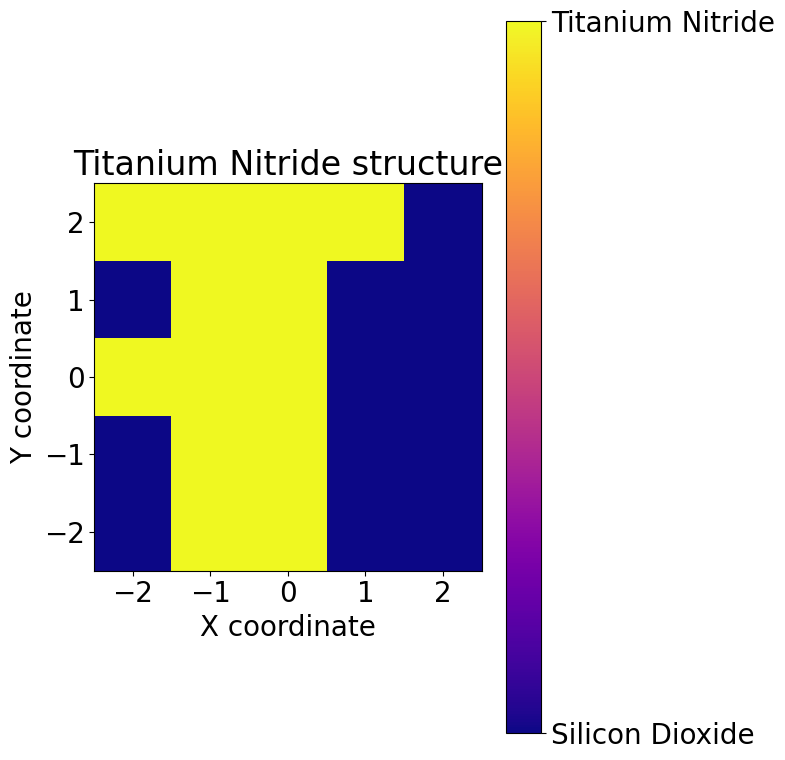

In [14]:


def plot_25_bit_squares(binary_vector):
    """
    將25個位元的二進位向量轉換為二維方塊圖。

    參數:
    binary_vector (str): 一個長度為25的字串，由'0'和'1'組成。

    回傳:
    None
    """
    # 驗證輸入字串的有效性
    if len(binary_vector) != 25 or not all(bit in '01' for bit in binary_vector):
        print("錯誤：輸入的向量必須是25個位元的二進位字串。")
        return

    # 將二進位字串轉換為 5x5 的 NumPy 陣列
    # 這裡的對應關係為：
    # 索引 i -> x 座標 = (i // 5) - 2, y 座標 = (i % 5) - 2
    matrix = np.zeros((5, 5))
    for i in range(25):
        # 根據您的座標對應關係，將 bit 1 放在 (-2, -2)
        # 這對應於矩陣的 matrix[0][0]
        row = i % 5
        col = i // 5
        matrix[row][col] = int(binary_vector[i])

    # 繪圖
    plt.rcParams['font.size'] = 20
    plt.figure(figsize=(8, 8))

    # 使用 imshow 繪製方塊圖
    # cmap='bwr' 是指藍色-白色-紅色漸層，這裡藍色代表0，紅色代表1
    # 為了使 y 軸從 -2 開始向上遞增，需要設定 origin='lower'
    # extent 定義了圖的邊界，讓座標軸正確顯示
    plt.imshow(matrix, cmap='plasma', origin='lower', extent=[-2.5, 2.5, -2.5, 2.5])

    # 設置標題和軸標籤
    plt.title('Titanium Nitride structure')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')

    # 設置座標軸刻度，使其對應方塊的中心
    plt.xticks(np.arange(-2, 3, 1))
    plt.yticks(np.arange(-2, 3, 1))

    # 顯示顏色條，以便了解顏色的對應值
    cbar = plt.colorbar(ticks=[0, 1])
    cbar.ax.set_yticklabels(['Silicon Dioxide', 'Titanium Nitride'])

    # 顯示格線，讓方塊邊界更清晰
    #plt.grid(True, which='both', color='k', linestyle='-', linewidth=0.5)

    # 調整佈局以防止標籤重疊
    plt.tight_layout()
    plt.show()

# 範例用法：
# 輸入一個25個位元的二進位字串
#TM
sample_vector = "0010111111111110000100000"
#TE
#sample_vector = "0011100111001010011100110"
plot_25_bit_squares(sample_vector)

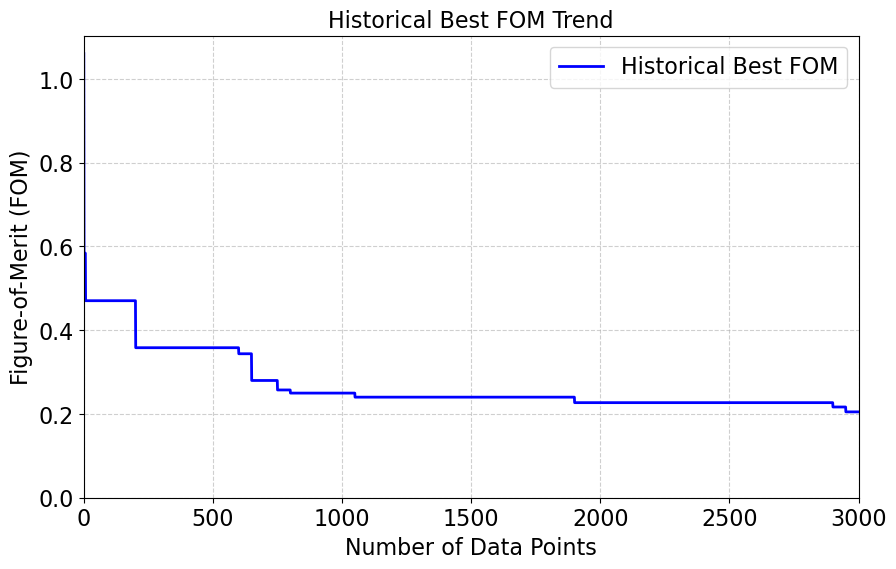

總共讀取了 3000 筆資料。
最終的歷史最佳 FOM 值為：0.205000


In [15]:


def plot_historical_best_fom(file_path):
    """
    從檔案中讀取 FOM 值，並繪製歷史最佳 FOM 趨勢圖。
    
    參數:
    - file_path (str): 包含 FOM 值的文字檔路徑。
    """
    try:
        # 讀取檔案並將每行轉換為浮點數
        with open(file_path, 'r') as file:
            fom_values = [float(line.strip()) for line in file if line.strip()]
    except FileNotFoundError:
        print(f"錯誤：找不到檔案 '{file_path}'。請檢查路徑是否正確。")
        return
    except ValueError:
        print(f"錯誤：檔案 '{file_path}' 中的資料格式不正確，請確保每行都是有效的數字。")
        return
    
    if not fom_values:
        print("錯誤：檔案中沒有任何有效的 FOM 值。")
        return
    
    # 初始化歷史最佳 FOM 列表
    historical_best_fom = []
    current_best = float('inf')  # 將初始最佳值設為無限大，確保第一筆資料能被取代
    
    # 遍歷所有 FOM 值，計算歷史最佳趨勢
    for fom in fom_values:
        if fom < current_best:
            current_best = fom
        historical_best_fom.append(current_best)
        
    # 建立橫軸資料：從 1 到資料總數
    data_points = range(1, len(fom_values) + 1)
    
    # 繪製圖表
    plt.figure(figsize=(10, 6))
    plt.plot(data_points, historical_best_fom, color='b', linestyle='-', linewidth=2, label='Historical Best FOM')
    plt.tick_params(labelsize=16)
    # 增加圖表標示
    plt.title('Historical Best FOM Trend', fontsize=16)
    plt.xlabel('Number of Data Points', fontsize=16)
    plt.ylabel('Figure-of-Merit (FOM)', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # 設定 X 軸和 Y 軸的起始點為 0
    plt.xlim(0,3000)
    plt.ylim(0)
    
    # 顯示圖表
    plt.show()
    
    print(f"總共讀取了 {len(fom_values)} 筆資料。")
    print(f"最終的歷史最佳 FOM 值為：{historical_best_fom[-1]:.6f}")

# 請將 'fom_data.txt' 替換為您的檔案路徑
plot_historical_best_fom('1d_array_ys_comma_0.205_500+50_50(TM)_new.txt')